# HW7: HMM


**STATS271/371: Applied Bayesian Statistics**

_Stanford University. Winter, 2021._

---

**Name:** _Your name here_

**Names of any collaborators:** _Names here_

*Due: 11:59pm Monday, May 24, 2021 via GradeScope*

---

In this homework we will learn how to fit a Hidden Markov Model. See the slides for Lap 7 ([Part 1](https://github.com/slinderman/stats271sp2021/blob/main/slides/lap7_hmms.pdf) and [Part 2](https://github.com/slinderman/stats271sp2021/blob/main/slides/lap7_hmms_b.pdf)) for more information on this model.

The data set we will be working with consists of player position data from a 2015-2016 NBA game between the Golden State Warriors and the Cleveland Cavaliers. This game will be broken into a couple hundred "events" (continuous plays in the game), and we will model this as a 20-dimensional HMM (the $x,y$ co-ordinates of the 10 players), where each event is a conditionally independent realization of the HMM. For simplicity, we will ignore the position of the ball and ignore plays that include inbounding (when there are only 9 players on the court).

Mathematically, let $\mathbf{x}_t^{(v)} \in \mathbb{R}^{20}$ denote the combined positions of all 10 players at time step $t$ of the $i$-th event, and let $\mathbf{x}_{1:T_i}^{(i)} = (\mathbf{x}_1^{(v)}, \ldots, \mathbf{x}_{T_v}^{(v)})$ denote the full sequence of positions for the $v$-th event, where $T_v$ is the number of time frames. Likewise, let $z_{1:T_v}^{(v)} = (z_1^{(v)}, \ldots, z_{T_v}^{(v)})$ denote the sequence of discrete states for the $i$-th event. 
We've downsampled the data to about 1.5fps or 0.66sec/time frame. 

The joint distribution of the complete dataset is,
\begin{align}
p(\{(z_{1:T_v}^{(v)}, \mathbf{x}_{1:T_v}^{(v)}\}_{v=1}^V \mid \Theta) 
&= \prod_{v=1}^V p(z_{1:T_v}^{(v)}, \mathbf{x}_{1:T_v}^{(v)} \mid \Theta) \\
&= \prod_{v=1}^V \left[p(z_1^{(v)} \mid \Theta) \prod_{t=2}^{T_v} p(z_{t}^{(v)} \mid z_{t-1}^{(v)} , \Theta)  \prod_{t=1}^{T_v} p(\mathbf{x}_{t}^{(v)} \mid z_{t}^{(v)}, \Theta) \right]
\end{align}
Your goal is to find the parameters $\Theta$ that maximize the marginal likelihood of the data by using EM. Then you'll use cross validation, holding out a random subset of events, to determine the number of discrete states. Finally, you'll visualize the inferred states in terms of the distribution over each player's location on the court.

**Note**: We've provided the data in both a numpy array and a CSV file. The first column of the CSV file includes the event index and the remaining columns include the player positions.

In [1]:
import numpy as np

event_data = np.load('event_data.npy', allow_pickle = True)
event_data = list(event_data)

print("number of events: ", len(event_data))
print("average event length: ", np.mean([len(xs) for xs in event_data]))
print("total number of time steps", np.sum([len(xs) for xs in event_data]))

number of events:  260
average event length:  16.515384615384615
total number of time steps 4294


# Part 1: Fit a HMM to the model

## Problem 1a: Implement EM for a Gaussian HMM
To get you started, we've provided a few function headers that you might find helpful.

**Note:** To keep it simple, you can assume a fixed, uniform initial distribution and a fixed transition matrix of the form \begin{align}
P_{ij} &= \begin{cases}
1-\epsilon & \text{if } i=j \\
\frac{\epsilon}{K-1} & \text{o.w.}
\end{cases}
\end{align}
for small-ish $\epsilon$.

In [2]:
def forward_pass(initial_dist, transition_matrix, log_likelihoods):
    """Perform the forward pass and return the forward messages for 
    a single "event".
    
    In the descriptions below, let K denote the number of discrete states
    and T the number of time steps.
    
    Parameters
    ---
    initial_dist: (K,) array with initial state probabilities
    transition_matrix: (K, K) array where each row is a transition probability
    log_likelihoods: (T, K) array with entries log p(x_t | z_t=k)
    
    Returns
    ---
    alphas: (T, K) array of forward messages
    """
    pass


def marginal_ll(alphas):
    """Compute the marginal likelihood using the forward messages.
    
    Parameters
    ----------
    alphas: (T, K) array of forward messages.
    
    Returns
    -------
    marginal_ll: real-valued scalar, log p(x_{1:T})
    """
    pass


def backward_pass(transition_matrix, log_likelihoods):
    """Perform the backward pass and return the backward messages for 
    a single "event".
        
    Parameters
    ---
    transition_matrix: (K, K) array where each row is a transition probability
    log_likelihoods: (T, K) array with entries log p(x_t | z_t=k)
    
    Returns
    ---
    betas: (T, K) array of backward messages
    """    
    pass


def e_step(data, parameters):
    """Run the E step for each event First compute the log likelihoods
    for each time step and discrete state using the given data and parameters.
    Then run the forward and backward passes and use the output to compute the 
    posterior marginals, and use marginal_ll to compute the marginal likelihood.
    
    Parameters
    ---
    data: list of (T, 20) arrays with player positions over time for each event
    parameters: a data structure containing the model parameters; i.e. the 
        initial distribution, transition matrix, and Gaussian means and 
        covariances.
    
    Returns
    ---
    expectations: list of (T, K) arrays of marginal probabilities 
        p(z_t = k | x_{1:T}) for each event.
    marginal_ll: marginal log probability p(x_{1:T}). This should go up 
        each iteration!
    """
    pass


def m_step(data, expectations):
    """Solve for the Gaussian parameters that maximize the expected log 
    likelihood. 
    
    Note: you can assume fixed initial distribution and transition matrix as
    described in the markdown above.
    
    Parameters
    ----------
    data: list of (T, 20) arrays with player positions over time for each event
    expectations: list of (T, K) arrays with marginal state probabilities from 
        the E step.
    
    Returns
    -------
    parameters: a data structure containing the model parameters; i.e. the 
        initial distribution, transition matrix, and Gaussian means and 
        covariances.
    """
    pass
    
    
def fit_hmm(data, num_states):
    """Fit an HMM using the EM algorithm above. You'll have to initialize the
    parameters somehow; k-means often works well. You'll also need to monitor 
    the marginal likelihood and check for convergence. 
    
    Returns
    -------
    lls: the marginal log likelihood over EM iterations
    parameters: the final parameters
    """
    pass

## Problem 1b: Cross-validation
Holding out 20% of the events, use cross-validation to determine the optimal number of latent states to use. Plot held-out likelihood vs number of states. For simplicity/time saving purposes, train and cross-validate your model using $[10,20,30,40,50]$ hidden states.


# Part 2: State visualization

Using the model selected from cross-validation, plot the player location distributions for a few states.

Specifically, let $b_k \in \mathbb{R}^20$ and $Q_k \in \mathbb{R}^{20 \times 20}$ denote the estimated mean and covariance of state $k$. From this, you can compute the mean location of each player by reshaping $b_k$ into a 10x2 array (one row per player). Likewise, you can compute the marginal covariance of that player's location by extracting the corresponding 2x2 diagonal block from $Q_k$. 

Overlay Gaussian contours for the locations of the 10 players on the basketball court, using the provided `court.png` file as the background. For an accurate portrayal of the positions, set `extent = [0,100,0,50]` so that the image has the same `x` and `y` limits as the data. If you're using python, you can use the following starter code to get yourself started.

Plot this for a few states. Some might look more interesting than others.

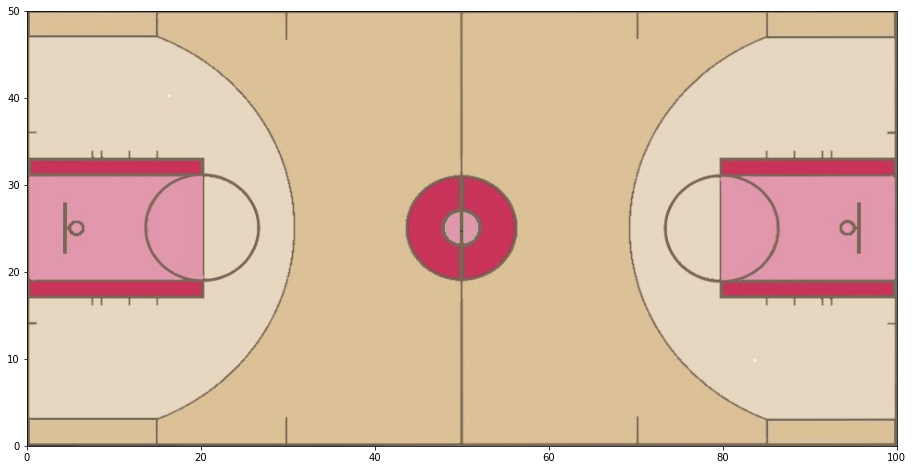

In [3]:
import matplotlib.pyplot as plt

img = plt.imread('court.png')
fig, ax = plt.subplots(figsize = (16,8))
ax.imshow(img, extent = [0,100,0,50])


'''
Insert your plotting code here
'''

plt.show()

# Part 3: Discussion Questions

### a) 

In a real basketball game, players do not move randomly, even among a specific latent state - there is some inherent smoothness in their decision making and hence movements. What adjustments would you make to the model to better incorporate these assumptions?

### b) 

In the data provided, we've symmetrized the data (so one team is only on offense in one direction, atypical to teams switching sides at the half), and players are consistently in the position that they play in relative to others. What would happen if for different plays, the players were randomly permuted?

Specifically, consider the following situations - what would happen if you tried to fit the model using the above calculated (fixed) number of latent states? What would happen if you did cross-validation again to recalculate the optimal number of latent states to use? 

# Submission Instructions


**Formatting:** check that your code does not exceed 80 characters in line width. If you're working in Colab, you can set _Tools &rarr; Settings &rarr; Editor &rarr; Vertical ruler column_ to 80 to see when you've exceeded the limit. 

Download your notebook in .ipynb format and use the following commands to convert it to PDF:
```
jupyter nbconvert --to pdf hw7_yourname.ipynb
```

**Dependencies:**

- `nbconvert`: If you're using Anaconda for package management, 
```
conda install -c anaconda nbconvert
```

**Upload** your .ipynb and .pdf files to Gradescope. 
